In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


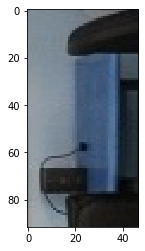

In [11]:
readimage = cv2.imread('../TP5/imquery.png')
plt.imshow(readimage)


In [12]:
#le code du profff
grayimage = cv2.cvtColor(readimage, cv2.COLOR_BGR2GRAY)
#creating a sift object and using detectandcompute() function to detect the keypoints and descriptor from the image
siftobject = cv2.SIFT_create()
keypoint, descriptor = siftobject.detectAndCompute(grayimage, None)

In [13]:
print(keypoint[0].pt)
print(keypoint[1].size)
print(keypoint[3].size)
print(keypoint[5].size)
print(keypoint[8].size)
print(keypoint[11].angle)
print(keypoint[0].response)
print(descriptor[12])

keypointimage = cv2.drawKeypoints(readimage, keypoint, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('SIFT', keypointimage)
cv2.waitKey()
cv2.imwrite('sift_keypoints.jpg',keypointimage)

(10.617937088012695, 72.40962982177734)
7.810985088348389
3.7969589233398438
1.990970492362976
3.3412024974823
97.60372924804688
0.046613238751888275
[  3.   3.  21.   4.   0.   0.   0.   2.   3.   7.  36.   4.   0.   0.
  11.  10.   2.  17.  35.   1.   0.   0.  40.  24.   1.   6.  25.   4.
   0.   5.  50.  23.  26.   4.  28.   4.   2.   5.   1.  11. 114.   5.
   9.   1.   0.   2. 110. 158.  12.   2.   2.   0.   9.  37. 158. 112.
   0.   0.   0.   0.  23.  50. 156.  40.  59.   4.   0.   0.  17.  28.
  14.  10. 158.  43.   0.   0.   2.   4.  17.  66.  98.  10.   0.   0.
  88.  75.  42.  21.   0.   0.   0.   0.  58.  55.   9.   0.  13.   0.
   0.   0.   6.  21.  79.  21. 158.  18.   0.   0.   1.   3.  17.  38.
 135.   8.   0.   0.  55.  67.   5.   6.   0.   0.   0.   0.  20.  57.
  37.   0.]


True


Keypoint 1 Attributes:
 - Coordinates (x, y): (5.201433181762695, 55.72195053100586)
 - Size: 3.7840964794158936
 - Angle: 70.78854370117188
 - Response: 0.02291882038116455

Descriptor for Keypoint 1:
[  9. 111.  50.   2.   1.   2.   5.  11.   9. 133. 133.   1.   0.   1.
   3.   2.   1. 133. 133.   0.   0.   2.   3.   0.   6. 133. 130.   0.
   0.   0.   1.   3.  28.  68.  82.   3.   0.   1.   1.   1. 133.  64.
  20.   1.   0.   7.  32.  35.  14.  55.  50.   0.   0.  65. 116.  16.
   1. 133. 104.   0.   0.  28.  63.   0.  35.  20.  10.   0.   0.   0.
   0.   1. 133.  26.   0.   0.   0.   1.   5.  19.  62.   2.   0.   0.
   0.  31.  69.  19.   2.   3.   1.   0.   0.  43. 121.   3.   0.   0.
   0.   0.   0.   0.   0.   0.   7.   0.   0.   0.   0.   0.   0.   1.
   8.   0.   0.   0.   0.   0.   1.   2.   4.   1.   0.   0.   0.   1.
   6.   2.]

Keypoint 2 Attributes:
 - Coordinates (x, y): (5.213160514831543, 121.91974639892578)
 - Size: 6.218463897705078
 - Angle: 8.8892822265625
 - Res

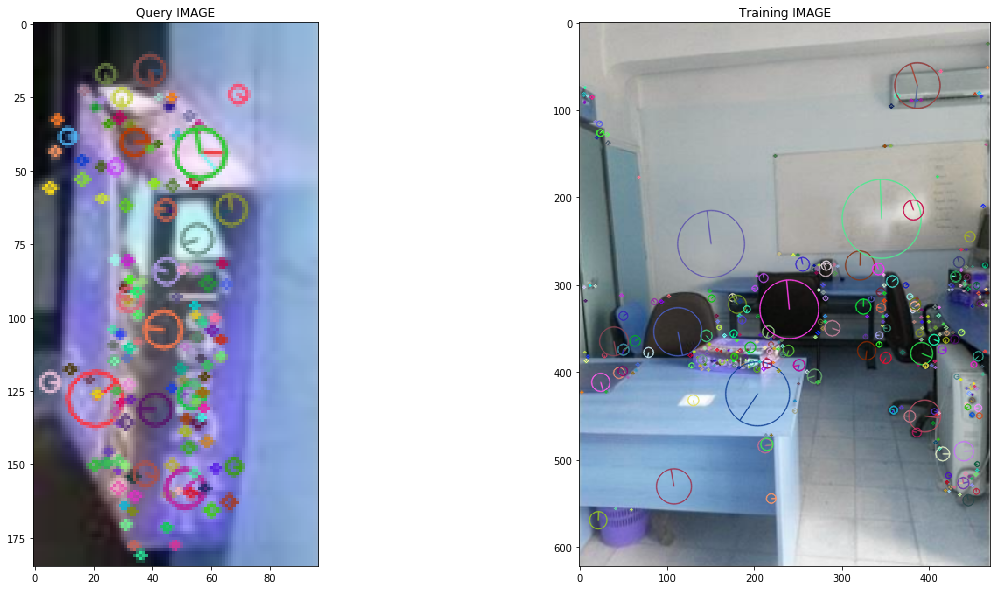

In [14]:
import cv2
import matplotlib.pyplot as plt

def visualize_keypoint_attributes(query, train):
    # Read query and train images
    query_image = cv2.imread(query)
    train_image = cv2.imread(train)

    # Convert images to grayscale
    query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)
    train_gray = cv2.cvtColor(train_image, cv2.COLOR_BGR2GRAY)

    # Create SIFT object
    sift = cv2.SIFT_create()

    # find the keypoints and descriptors with SIFT
    # Detect and compute keypoints and descriptors for query image
    query_keypoints, query_descriptors = sift.detectAndCompute(query_gray, None)

    # Detect and compute keypoints and descriptors for train image
    train_keypoints, train_descriptors = sift.detectAndCompute(train_gray, None)

    # Visualize keypoint attributes and descriptors
    for i, keypoint in enumerate(query_keypoints):
        print(f"\nKeypoint {i + 1} Attributes:")
        print(f" - Coordinates (x, y): {keypoint.pt}")
        print(f" - Size: {keypoint.size}")
        print(f" - Angle: {keypoint.angle}")
        print(f" - Response: {keypoint.response}")

        # Display the corresponding descriptor
        print(f"\nDescriptor for Keypoint {i + 1}:")
        print(query_descriptors[i])

    # Draw keypoints on the images
    query_keypoint_image = cv2.drawKeypoints(query_image, query_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    train_keypoint_image = cv2.drawKeypoints(train_image, train_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



    # Display keypoints on the images
    fx, plots = plt.subplots(1, 2, figsize=(20, 10))

    plots[0].set_title("Query IMAGE")
    plots[0].imshow(query_keypoint_image)

    plots[1].set_title("Training IMAGE")
    plots[1].imshow(train_keypoint_image)

    # Save the images with keypoints
    cv2.imwrite('sift_keypoints_query.jpg', query_keypoint_image)
    cv2.imwrite('sift_keypoints_train.jpg', train_keypoint_image)

    return query_descriptors, train_descriptors, train_keypoints, query_keypoints

query = '../TP5/query.png'
train = '../TP5/train.png'
query_descriptors, train_descriptors, train_keypoints, query_keypoints = visualize_keypoint_attributes(query, train)


[  0.   0.   1.   0.   0.   0.   1.   1. 116.  14.  12.   1.   0.   0.
  21.  82. 171.  10.   0.   0.   0.   2.   4.  98.  52.   6.   1.   2.
   1.   8.   8.  15.   0.   0.   0.   0.   0.   0.   1.   0. 106.   1.
   0.   0.   0.   0.  23.  90. 171.  18.   0.   0.   0.   5.   6.  86.
  42.   5.   0.   1.   7.  36.  17.  15.   0.   0.   0.   0.   0.   0.
   0.   0.  58.  18.  15.   1.   0.   0.   2.  19. 171. 171.  14.   0.
   0.   1.   1.   8.  49.  83.   5.   3.  19.  13.   1.   1.   0.   0.
   0.   0.   0.   0.   0.   0.   1.  18.  46.   4.   0.   0.   0.   0.
  39. 171.  52.   2.   0.   0.   0.   0.  27. 171.  12.   5.   2.   0.
   0.   0.] (5.085839748382568, 121.91287231445312)


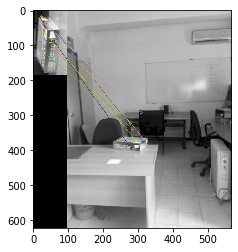

In [15]:
def BR_matching_sorting_visualize_keypoints(query, train, querydesc, traindesc):
    query = cv2.imread(query,0) # queryImage
    train = cv2.imread(train,0) # trainImage

    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(query,None)
    kp2, des2 = sift.detectAndCompute(train,None)
    print(des1[0],kp1[0].pt)

    # BFMatcher with default params

    # create BFMatcher object
    bf = cv2.BFMatcher()

    # Match descriptors.
    matches = bf.match(querydesc,traindesc)

    # sort the matches based on distance
    matches = sorted(matches, key=lambda val: val.distance)
    

    result = cv2.drawMatches(query,kp1,train,kp2,matches[:7], None, flags=2)

    plt.imshow(result),plt.show()
    
BR_matching_sorting_visualize_keypoints(query, train, query_descriptors, train_descriptors)

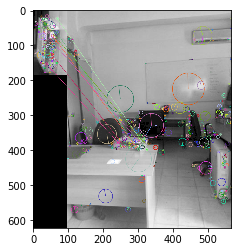

In [19]:
def BR_matching_sorting(query, train):
    query = cv2.imread(query,0) # queryImage
    train = cv2.imread(train,0) # trainImage

    # Initiate SIFT detector
    sift = cv2.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(query,None)
    kp2, des2 = sift.detectAndCompute(train,None)
    query_keypoint_image = cv2.drawKeypoints(query, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    train_keypoint_image = cv2.drawKeypoints(train, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    

    # create BFMatcher object
    bf = cv2.BFMatcher()

    # Match descriptors.
    matches = bf.match(des1,des2)

    # sort the matches based on distance
    matches = sorted(matches, key=lambda val: val.distance)
    

    result = cv2.drawMatches(query_keypoint_image,kp1,train_keypoint_image,kp2,matches[:7], None, flags=2)
    cv2.imwrite('Output_recherché.jpg', result)
    plt.imshow(result),plt.show()
    

BR_matching_sorting(query, train)